In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [2]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


## Question: Does the experiment page drive higher traffic than the control page?

In [3]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').count()[0] / control_df.query('action == "view"').count()[0]

# Display click through rate
control_ctr

0.23452157598499063

In [4]:
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').count()[0] / experiment_df.query('action == "view"').count()[0]

# Display click through rate
experiment_ctr

0.2642986152919928

In [5]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.02977703930700215

In [6]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').count()[0] / control_df.query('action == "view"').count()[0]
    experiment_ctr = experiment_df.query('action == "enroll"').count()[0] / experiment_df.query('action == "view"').count()[0]
    diffs.append(experiment_ctr - control_ctr)


In [7]:
control_df.query('action == "enroll"').count()

timestamp    397
id           397
group        397
action       397
duration     393
dtype: int64

In [8]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.018061531153800492

In [9]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').count()[0] / control_df.query('action == "view"').count()[0]
    experiment_ctr = experiment_df.query('action == "enroll"').count()[0] / experiment_df.query('action == "view"').count()[0]
    diffs.append(experiment_ctr - control_ctr)


(array([  28.,  162.,  676., 1623., 2548., 2591., 1532.,  657.,  162.,
          21.]),
 array([-0.03790509, -0.02435367, -0.01080224,  0.00274919,  0.01630061,
         0.02985204,  0.04340347,  0.05695489,  0.07050632,  0.08405775,
         0.09760917]),
 <a list of 10 Patch objects>)

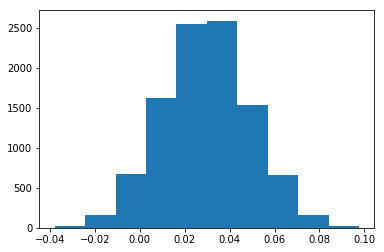

In [10]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs)

(array([  12.,  106.,  551., 1618., 2649., 2730., 1645.,  583.,   92.,
          14.]),
 array([-0.07444428, -0.05964709, -0.0448499 , -0.03005271, -0.01525553,
        -0.00045834,  0.01433885,  0.02913604,  0.04393322,  0.05873041,
         0.0735276 ]),
 <a list of 10 Patch objects>)

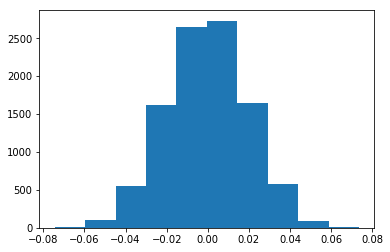

In [11]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0,diffs.std(),diffs.size)

# Plot the null distribution
plt.hist(null_vals)

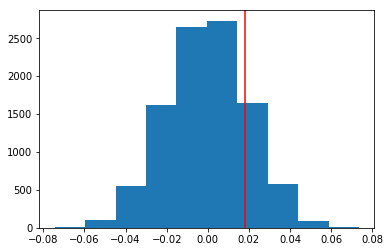

In [12]:
# Plot observed statistic with the null distibution

plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')

In [13]:
# Compute p-value
(null_vals > obs_diff).mean()

0.1785

Do you have evidence, with a type I error rate of 0.05, that the enrollment rate for this course increases when using the experimental description on its overview page?
- no

## Question: does one page engage users for a longer period of time?

In [14]:
views = df.query('action=="view"')

In [15]:
reading_times = views.groupby(['id','group'])['duration'].mean()

In [16]:
reading_times = reading_times.reset_index()
reading_times.head()

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097


In [17]:
control_mean = df.query('group=="control"')['duration'].mean()
experiment_mean = df.query('group=="experiment"')['duration'].mean()
experiment_mean, control_mean

(130.93220512539497, 115.40710650582048)

In [18]:
obs_diff = experiment_mean - control_mean
obs_diff

15.525098619574493

In [19]:
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace = True)
    control_mean = df.query('group=="control"')['duration'].mean()
    experiment_mean = df.query('group=="experiment"')['duration'].mean()
    diffs.append(experiment_mean - control_mean)

(array([    0.,     0.,     0.,     0.,     0., 10000.,     0.,     0.,
            0.,     0.]),
 array([15.02509862, 15.12509862, 15.22509862, 15.32509862, 15.42509862,
        15.52509862, 15.62509862, 15.72509862, 15.82509862, 15.92509862,
        16.02509862]),
 <a list of 10 Patch objects>)

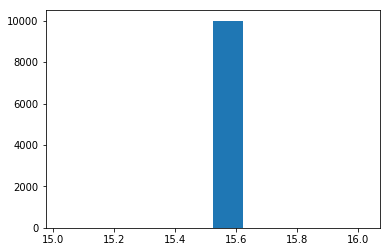

In [20]:
diffs = np.array(diffs)
plt.hist(diffs)